# Turbo Engine Failure Prediction

## Work environment setup

### Load Data and Libraries

In [29]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

train_data = pd.read_csv("train_FD001.csv", sep=";")
test_data = pd.read_csv("test_FD001_100ex.csv", sep=";")

### Separate labels and features

In [30]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

## Univariate Analysis

An initial univariate analysis was performed to provide insights on how to process the data, as well as the classifiers to consider and their parameters. Histograms without values are provided only for visualization of how the values are distributed, while for actual values statistics are presented in table form.

There are no undefined values and it was observed that some of the features have no variance and are therefore not relevant for a classification task, while many of the features closely resemble a normal distribution.

### Train data

,max,min,mean,median,var,std
setting1,0.0087,-0.0087,-0.000009,0.0000,4.784340e-06,2.187313e-03
setting2,0.0006,-0.0006,0.000002,0.0000,8.588541e-08,2.930621e-04
setting3,100.0000,100.0000,100.000000,100.0000,0.000000e+00,0.000000e+00
s1,518.6700,518.6700,518.670000,518.6700,0.000000e+00,0.000000e+00
s2,644.5300,641.2100,642.680934,642.6400,2.500533e-01,5.000533e-01
s3,1616.9100,1571.0400,1590.523119,1590.1000,3.759099e+01,6.131150e+00
s4,1441.4900,1382.2500,1408.933782,1408.0400,8.101089e+01,9.000605e+00
s5,14.6200,14.6200,14.620000,14.6200,3.155597e-30,1.776400e-15
s6,21.6100,21.6000,21.609803,21.6100,1.929279e-06,1.388985e-03
s7,556.0600,549.8500,553.367711,553.4400,7.833883e-01,8.850923e-01


,Label,Count,%
0,yes,3100,15.025932
1,no,17531,84.974068


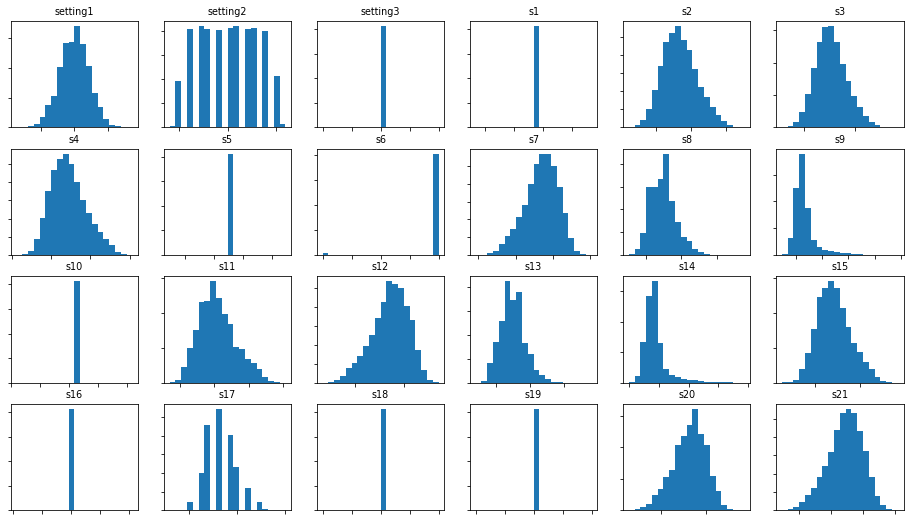

In [31]:
# feature statistics
x_stats = pd.concat(
            [x.max(),
             x.min(),
             x.mean(),
             x.median(),
             x.var(),
             x.std()],
    axis=1)
x_stats.columns=['max', 'min', 'mean', 'median', 'var', 'std']
display(x_stats)

# label statistics
x_label_stats = pd.DataFrame(data=
                 {"Label": ["yes", "no"],
                  "Count":
                      [y[y == "yes"].count(),
                       y[y == "no"].count()],
                  "%":
                      [y[y == "yes"].count() / (y[y == "yes"].count() + y[y == "no"].count()) * 100,
                       y[y == "no"].count() / (y[y == "yes"].count() + y[y == "no"].count()) * 100]})
display(x_label_stats)

# feature distributions
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    ax.hist(x.iloc[:,idx],bins=20)
    ax.title.set_text(x.columns[idx])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

### Test data

,max,min,mean,median,var,std
setting1,0.0076,-0.0059,-0.000073,-0.00025,5.535526e-06,2.352770e-03
setting2,0.0005,-0.0005,0.000022,0.00010,9.385455e-08,3.063569e-04
setting3,100.0000,100.0000,100.000000,100.00000,0.000000e+00,0.000000e+00
s1,518.6700,518.6700,518.670000,518.67000,0.000000e+00,0.000000e+00
s2,644.0300,641.7500,642.768400,642.77500,1.976621e-01,4.445920e-01
s3,1607.5500,1576.9300,1591.824700,1591.36500,4.417321e+01,6.646293e+00
s4,1428.4200,1389.3300,1410.548200,1410.30000,7.441381e+01,8.626344e+00
s5,14.6200,14.6200,14.620000,14.62000,3.187317e-30,1.785306e-15
s6,21.6100,21.6000,21.609900,21.61000,1.000000e-06,1.000000e-03
s7,555.0700,550.8800,553.148900,553.27000,7.749129e-01,8.802914e-01


,Label,Count,%
0,yes,25,25.0
1,no,75,75.0


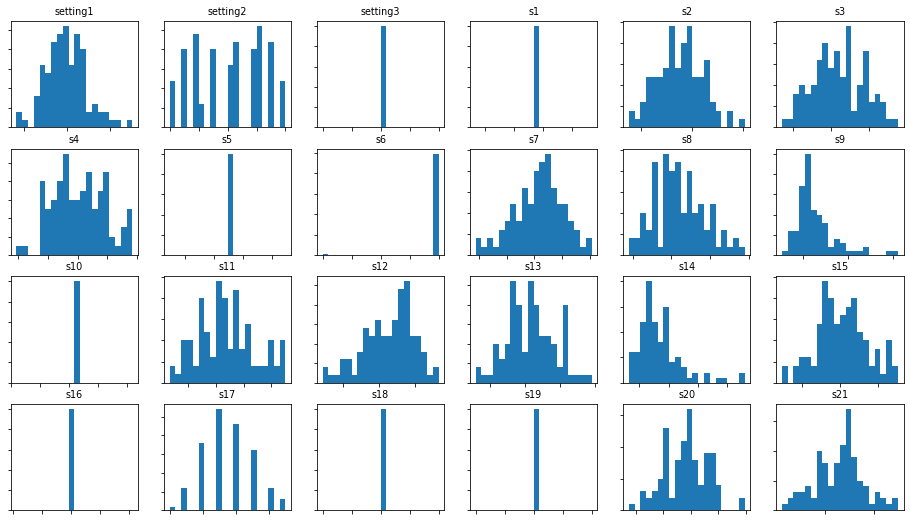

In [32]:
# feature statistics
x_test_stats = pd.concat(
            [x_test.max(),
             x_test.min(),
             x_test.mean(),
             x_test.median(),
             x_test.var(),
             x_test.std()],
    axis=1)
x_test_stats.columns=['max', 'min', 'mean', 'median', 'var', 'std']
display(x_test_stats)

# label statistics
x_test_label_stats = pd.DataFrame(data=
                 {"Label": ["yes", "no"],
                  "Count":
                      [y_test[y_test == "yes"].count(),
                       y_test[y_test == "no"].count()],
                  "%":
                      [y_test[y_test == "yes"].count() / (y_test[y_test == "yes"].count() + y_test[y_test == "no"].count()) * 100,
                       y_test[y_test == "no"].count() / (y_test[y_test == "yes"].count() + y_test[y_test == "no"].count()) * 100]})
display(x_test_label_stats)

# feature distributions
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    ax.hist(x_test.iloc[:,idx],bins=20)
    ax.title.set_text(x_test.columns[idx])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

## Preprocessing

### Encode class labels
Encoding is straightforward, as it is a binary classification problem.

In [33]:
label_mapping = {"yes": 1,
                 "no": 0}

y = y.map(label_mapping)
y_test = y_test.map(label_mapping)

### Normalization
Since the profile of many of the features seems to approach a standard distribution, the group opted for a z-score normalization, which is not only appropriate for this dataset, it also has the added benefit of centering the data, which is import for some of the classifiers that will be used such as SVM and neural networks.

In [34]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

x = stdScaler.fit_transform(x)
x_test = stdScaler.transform(x_test)

### Dimension Reduction

#### PCA

The chosen approach for dimension reduction was a PCA. The basis for this decision is that not only is it benefitial for some classifiers, it is also useful for denoising, as we already know that the dataset has added noise and the contribution of noise to the total variance of the features is likely to be less significant than the patterns that will allow us to predict the label for each feature. Additionally, one of the main disadvantages of using a PCA for dimension reduction is that it becomes hard to understand what each resulting feature represents, however that is not a problem for our particular dataset, as the starting features are already anonymous, so there is little downside to this approach.

The explained variance that was considered was 90%, which falls within the typical range of 80% to 95% common for these applications, and should be enough to remove the noise.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, svd_solver='full') # set PCA to explain 90% of the variance
x = pca.fit_transform(x)
x_test = pca.transform(x_test)
print(sum(pca.explained_variance_ratio_), x.shape[1]) # it takes 9 components of the 24 original ones to explain at least 90% of the variance

0.913429923436506 9


#### Kernel PCA

For nonlinear relationships between the features a Kernel PCA can be employed for better results. Since the features are anonymous the group had no way of knowing beforehand if the features might be related nonlinearly, so a test was made with 30 components. However, this did not yield any improvement for the classifiers accuracy, so this code was commented out. The number of components needed to better describe their relationship may need to be adjusted, however, it is more likely that the features are not related nonlinearly after all, and since the kernel PCA may be very computationally intensive, it was decided against its use.

In [36]:
# from sklearn.decomposition import KernelPCA

# pca = KernelPCA(eigen_solver='randomized', n_components=30, kernel='rbf', n_jobs=6, random_state=43, remove_zero_eig=True)
# x = pca.fit_transform(x)
# x_test = pca.transform(x_test)
# print(x.shape[1])

## Training

### SVM 

Models using support vector machine classifiers were tested. Three different models were trained, one using a linear kernel, another using a radial basis function kernel and a last one using a polynomial kernel.
All the three different models reproduced similar results with a validation accuracy of 96% and a test accuracy of 93%.

The following SVM parameters were tuned:
- C - Regularization parameter
- Gamma - Kernel coefficient for radial basis function and pollynomial
- Degree - Degree of the pollynomial kernel function

#### Linear
For the Linear kernel, 5-fold cross validation was used varing the C parameter. The best C parameter was 0.1.

In [25]:

print(svm.LinearSVC().get_params())
    
parameter_grid = [{
     
    "C":[0.001, 0.01, 0.1,1,10],
    "max_iter": [10000000]
    
}]

grid_search = GridSearchCV(svm.LinearSVC(), parameter_grid, cv=5, scoring="accuracy", verbose=4)
grid_search.fit(x,y)
  
results = pd.DataFrame(grid_search.cv_results_)
y_pred = grid_search.predict(x_test)

print("\nCrossvalidation statistics:")
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

print("Classifier performance for best parameters:")
print(classification_report(y_test, y_pred))

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 2/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 3/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 4/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 5/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 1/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 2/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 3/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 4/5] END ......................C=0.01, max_iter=10000000; tot

rank_test_score,mean_test_score,std_test_score,C,max_iter
1,0.957927,0.007510,0.100000,10000000
2,0.957830,0.007548,1.000000,10000000
3,0.957781,0.007039,10.000000,10000000
4,0.957539,0.006860,0.001000,10000000
5,0.957151,0.006976,0.010000,10000000


Classifier performance for best parameters:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.72      0.84        25

    accuracy                           0.93       100
   macro avg       0.96      0.86      0.90       100
weighted avg       0.94      0.93      0.93       100



#### RBF
For the radial basis function kernel, 5-fold cross validation was used varing the C and gamma parameters. The best C parameter was 10 and gamma was 100.

In [ ]:

print(svm.LinearSVC().get_params())
    
parameter_grid = [{
     
    "C":[0.001, 0.01, 0.1,1,10],
    "max_iter": [10000000]
    
}]

grid_search = GridSearchCV(svm.LinearSVC(), parameter_grid, cv=5, scoring="accuracy", verbose=4)
grid_search.fit(x,y)
  
results = pd.DataFrame(grid_search.cv_results_)
y_pred = grid_search.predict(x_test)

print("\nCrossvalidation statistics:")
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

print("Classifier performance for best parameters:")
print(classification_report(y_test, y_pred))

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 2/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 3/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 4/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 5/5] END .....................C=0.001, max_iter=10000000; total time=   0.0s
[CV 1/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 2/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 3/5] END ......................C=0.01, max_iter=10000000; total time=   0.0s
[CV 4/5] END ......................C=0.01, max_iter=10000000; tot

rank_test_score,mean_test_score,std_test_score,C,max_iter
1,0.957927,0.007510,0.100000,10000000
2,0.957830,0.007548,1.000000,10000000
3,0.957781,0.007039,10.000000,10000000
4,0.957539,0.006860,0.001000,10000000
5,0.957151,0.006976,0.010000,10000000


Classifier performance for best parameters:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.72      0.84        25

    accuracy                           0.93       100
   macro avg       0.96      0.86      0.90       100
weighted avg       0.94      0.93      0.93       100



#### Polynomial
For the polynomial kernel, 5-fold cross validation was used varing the degree of the polynomial kernel function. No more parameters were tuned because it would be too computational intensive.

In [ ]:
parameter_grid = [{
     
    "kernel" :["poly"],
    "degree" : [2,3,4,5]
    
}]

grid_search = GridSearchCV(svm.SVC(), parameter_grid, cv=5, scoring="accuracy", verbose=4)
grid_search.fit(x,y)
  
results = pd.DataFrame(grid_search.cv_results_)
y_pred = grid_search.predict(x_test)

print("\nCrossvalidation statistics:")
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

print("Classifier performance for best parameters:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........................degree=2, kernel=poly; total time=   1.3s
[CV 2/5] END ..........................degree=2, kernel=poly; total time=   1.2s
[CV 3/5] END ..........................degree=2, kernel=poly; total time=   1.3s
[CV 4/5] END ..........................degree=2, kernel=poly; total time=   1.2s
[CV 5/5] END ..........................degree=2, kernel=poly; total time=   1.3s
[CV 1/5] END ..........................degree=3, kernel=poly; total time=   1.3s
[CV 2/5] END ..........................degree=3, kernel=poly; total time=   1.0s
[CV 3/5] END ..........................degree=3, kernel=poly; total time=   1.0s
[CV 4/5] END ..........................degree=3, kernel=poly; total time=   0.9s
[CV 5/5] END ..........................degree=3, kernel=poly; total time=   0.9s
[CV 1/5] END ..........................degree=4, kernel=poly; total time=   1.4s
[CV 2/5] END ..........................degree=4, 

rank_test_score,mean_test_score,std_test_score,degree,kernel
1,0.960835,0.006971,4,poly
2,0.959575,0.005692,2,poly
3,0.959284,0.005981,3,poly
4,0.957830,0.004903,5,poly


Classifier performance for best parameters:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.72      0.84        25

    accuracy                           0.93       100
   macro avg       0.96      0.86      0.90       100
weighted avg       0.94      0.93      0.93       100



### Neural Network

Another model we experimented with was the Neural Network, the Multi-Layer Perceptron from sklearn. There were a lot of parameters to experiment with for the parameter grid, for the solver, activation and learning rate, we picked some of the ussually recomended choices and set them against eachother. The same went for the numerical values of alpha and learning rate init, however after the first trial of the later, it was clear that 0.001 was doing far better than other choices. The forced parameter max_iter, serves to make sure all of the combinations include 1000 iterations of maximum instead of the default 200, for them to have enough to converge. Finally the hidden layers were experimented with 2 and 3 layers, of sizes based on the number of features and 50% more and less, the best results happened when it had 12 sized layers, and having 3 layers didn't seem to give it a clear advantage over 2. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

MLPClassifier().get_params()

parameter_grid = [
    {
        'solver': ['adam', 'sgd'],
        'max_iter': [1000],
        'hidden_layer_sizes': [(9,9), (12,12),(12,12,12)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
        'learning_rate_init': [0.001]
    }
]

grid_search = GridSearchCV(MLPClassifier(), parameter_grid, cv=5, scoring="accuracy", verbose=4)
grid_search.fit(x, y)
results = pd.DataFrame(grid_search.cv_results_)
y_pred = grid_search.predict(x_test)

print("\nCrossvalidation statistics:")
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

print("Classifier performance for best parameters:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.971 total time=   2.8s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   4.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   2.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.948 total time=   2.8s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   2.2s
[CV 1/5] END activation=tanh, alp

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.971 total time=   7.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.959 total time=   5.9s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   6.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.949 total time=   6.9s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.957 total time=   4.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12

[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   3.0s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   3.7s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.949 total time=   3.0s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.960 total time=   2.9s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.970 total time=   4.6s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, l

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.957 total time=   4.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.958 total time=   4.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.948 total time=   4.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.951 total time=   3.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.970 total time=   3.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 12), learning_rate=constant, 

[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   1.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   2.5s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.949 total time=   2.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.958 total time=   2.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.970 total time=   3.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate

[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   3.7s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.948 total time=   5.3s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   4.6s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.971 total time=   3.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   4.8s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), lea

rank_test_score,mean_test_score,std_test_score,activation,alpha,hidden_layer_sizes,learning_rate,learning_rate_init,max_iter,solver
1,0.961465,0.006924,relu,0.050000,"(12, 12)",adaptive,0.001000,1000,adam
2,0.961174,0.007307,tanh,0.050000,"(12, 12, 12)",constant,0.001000,1000,adam
3,0.961029,0.007630,relu,0.050000,"(12, 12, 12)",constant,0.001000,1000,sgd
4,0.960981,0.004838,relu,0.000100,"(12, 12)",adaptive,0.001000,1000,adam
5,0.960932,0.006721,relu,0.000100,"(9, 9)",constant,0.001000,1000,adam
6,0.960932,0.006260,tanh,0.050000,"(9, 9)",adaptive,0.001000,1000,adam
6,0.960932,0.007352,tanh,0.050000,"(12, 12)",constant,0.001000,1000,adam
8,0.960932,0.006655,tanh,0.050000,"(12, 12)",adaptive,0.001000,1000,adam
9,0.960835,0.006755,tanh,0.000100,"(12, 12, 12)",adaptive,0.001000,1000,sgd
10,0.960787,0.007408,relu,0.050000,"(12, 12, 12)",adaptive,0.001000,1000,adam


Classifier performance for best parameters:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.72      0.84        25

    accuracy                           0.93       100
   macro avg       0.96      0.86      0.90       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

MLPClassifier().get_params()

parameter_grid = [
    {
        'solver': ['adam', 'sgd'],
        'max_iter': [1000],
        'hidden_layer_sizes': [(9,9), (12,12),(12,12,12)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
        'learning_rate_init': [0.001]
    }
]

grid_search = GridSearchCV(MLPClassifier(), parameter_grid, cv=5, scoring="accuracy", verbose=4)
grid_search.fit(x, y)
results = pd.DataFrame(grid_search.cv_results_)
y_pred = grid_search.predict(x_test)

print("\nCrossvalidation statistics:")
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

print("Classifier performance for best parameters:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.971 total time=   2.8s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   4.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   2.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.948 total time=   2.8s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   2.2s
[CV 1/5] END activation=tanh, alp

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.971 total time=   7.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.959 total time=   5.9s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   6.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.949 total time=   6.9s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.957 total time=   4.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12, 12

[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   3.0s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   3.7s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.949 total time=   3.0s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.960 total time=   2.9s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.970 total time=   4.6s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(12, 12), learning_rate=adaptive, l

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.957 total time=   4.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.958 total time=   4.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.948 total time=   4.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 9), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.951 total time=   3.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.970 total time=   3.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 12), learning_rate=constant, 

[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   1.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.962 total time=   2.5s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.949 total time=   2.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.958 total time=   2.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.970 total time=   3.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(9, 9), learning_rate=constant, learning_rate

[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   3.7s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.948 total time=   5.3s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=sgd;, score=0.960 total time=   4.6s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.971 total time=   3.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam;, score=0.961 total time=   4.8s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(12, 12, 12), lea

rank_test_score,mean_test_score,std_test_score,activation,alpha,hidden_layer_sizes,learning_rate,learning_rate_init,max_iter,solver
1,0.961465,0.006924,relu,0.050000,"(12, 12)",adaptive,0.001000,1000,adam
2,0.961174,0.007307,tanh,0.050000,"(12, 12, 12)",constant,0.001000,1000,adam
3,0.961029,0.007630,relu,0.050000,"(12, 12, 12)",constant,0.001000,1000,sgd
4,0.960981,0.004838,relu,0.000100,"(12, 12)",adaptive,0.001000,1000,adam
5,0.960932,0.006721,relu,0.000100,"(9, 9)",constant,0.001000,1000,adam
6,0.960932,0.006260,tanh,0.050000,"(9, 9)",adaptive,0.001000,1000,adam
6,0.960932,0.007352,tanh,0.050000,"(12, 12)",constant,0.001000,1000,adam
8,0.960932,0.006655,tanh,0.050000,"(12, 12)",adaptive,0.001000,1000,adam
9,0.960835,0.006755,tanh,0.000100,"(12, 12, 12)",adaptive,0.001000,1000,sgd
10,0.960787,0.007408,relu,0.050000,"(12, 12, 12)",adaptive,0.001000,1000,adam


Classifier performance for best parameters:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.72      0.84        25

    accuracy                           0.93       100
   macro avg       0.96      0.86      0.90       100
weighted avg       0.94      0.93      0.93       100



### Random Forest

For the Random Forest classifier the following parameter values were chosen:
- n_estimators: 10, 100, 500 - these are the number of trees used for the forest, it is not possible to know beforehand the best number for a given problem so 3 values were chosen in an attempt to provide a comprehensive range, without too fine a grid as a single tree does not have a significant impact.
- criterion: entropy, gini - the impurity function used for defining the split at each node, it is also not possible to know what will work best beforehand so all two possible options were considered.
- max_depth: 2, 3, 4, 5, 6, None - the number of nodes of each tree, if set to None more splits will be created until all nodes are pure. Values on a lower range were considered to understand if limiting the number of nodes would have a positive impact, and then also without any limitation, in case it gives a better result.
- max_features: sqrt, log2 - how the number of features to consider at each split will be defined, based on the number of total features of the problem. The 2 most common choices for classification problems were chosen.
- random_state: 0, 42 - this option is merely to make the results reproducible by setting the seed, as this classifier involves some randomness. The two most popular options were chosen.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

RandomForestClassifier().get_params()

parameter_grid = [
    {
        "n_estimators": [10, 100, 500],
        "criterion": ["entropy", "gini"],
        "max_depth": [2, 3, 4, 5, 6, None], # tree depth, None will keep splitting until the node is pure
        "max_features": ["sqrt", "log2"], # number of features to consider at each split, the 2 most common choices for classification problems were chosen
        "random_state": [0, 42], # for results reproducibility. More than one value should be considered to guarantee results are stable across different values. 0 and 42 are recommended in the scikit learn docs
        "n_jobs": [-1], # use all processors for best performance
    }
]
grid_search = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=5, scoring="accuracy", verbose=0)
grid_search.fit(x, y)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [10, 100, 500], 'n_jobs': [-1],
                          'random_state': [0, 42]}],
             scoring='accuracy')

#### Crossvalidation statistics

In [38]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[["rank_test_score", "params", "mean_test_score", "std_test_score"]].sort_values("rank_test_score")
results = results.drop('params', axis=1).join(pd.DataFrame(results.params.values.tolist()))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 1000)
display(results.style.hide_index())

/tmp/ipykernel_8319/641787738.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(results.style.hide_index())


rank_test_score,mean_test_score,std_test_score,criterion,max_depth,max_features,n_estimators,n_jobs,random_state
1,0.960738,0.005919,entropy,5.000000,log2,500,-1,0
1,0.960738,0.005919,gini,3.000000,sqrt,10,-1,42
3,0.960641,0.006098,entropy,2.000000,log2,10,-1,42
3,0.960641,0.006098,gini,2.000000,sqrt,500,-1,0
5,0.960593,0.005798,entropy,2.000000,sqrt,500,-1,42
5,0.960593,0.005798,entropy,4.000000,sqrt,10,-1,42
7,0.960544,0.005767,entropy,2.000000,sqrt,10,-1,42
7,0.960544,0.005767,gini,2.000000,log2,500,-1,0
9,0.960496,0.005791,gini,3.000000,sqrt,100,-1,0
9,0.960496,0.005791,entropy,nan,log2,500,-1,0


#### Classifier evaluation for best parameters

In [39]:
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100



## Ensemble

In an effort to try different options, we briefly looked at ensemble classifiers as a curiosity. Taking the best parameters for each of our classifiers, we make 3 classifiers and build a voting classifiers from it. Then train and test it considering 5-fold cross validation. Unfortunally, because we only have 3 classifiers all with relativy large accuracies as they stand, the ensemble model doesn't bring improvements, in fact the Neural Network and the Random forest likely vote against the SVM's correct prediction on the occassions that bring the accuracy down. Regardless we can see trough the confusion matrix that only 1 false positive and 7 false negatives appear.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def get_confusion_matrix(clf, y_pred_test, y_test):
    cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
    return cm

def display_cm(clf, cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    


In [ ]:
from sklearn.ensemble import VotingClassifier

nn_clf1 = MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=(12,12), learning_rate='adaptive', learning_rate_init=0.001, max_iter=1000, solver='adam')
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2', n_estimators=500, n_jobs=-1, random_state=0)
svm_clf = svm.SVC(gamma=100, C=10)

ensemble_clf = VotingClassifier(estimators=[('mlp1',nn_clf1), ('rf',rf_clf), ('svm',svm_clf)], voting='soft')

Fold: 1, Class dist.: [14024  2480], Acc: 0.962
Fold: 2, Class dist.: [14025  2480], Acc: 0.958
Fold: 3, Class dist.: [14025  2480], Acc: 0.962
Fold: 4, Class dist.: [14025  2480], Acc: 0.963
Fold: 5, Class dist.: [14025  2480], Acc: 0.960

CV accuracy: 0.961 +/- 0.002

 Generalization on the test set  
 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100



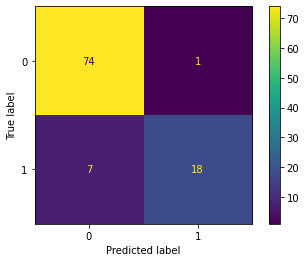

In [ ]:
scores=[];    
kfold = StratifiedKFold(n_splits=5,  shuffle=True).split(x, y)

for k, (train, test) in enumerate(kfold):
    Xtrain=stdScaler.fit_transform(x[train])
    Xtest=stdScaler.transform(x[test])    
    ensemble_clf.fit(Xtrain, y[train])
    score = ensemble_clf.score(Xtest, y[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y[train]), score))
   
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

##Model trained with all training data
print('\n Generalization on the test set  \n \n')

Xtr=stdScaler.fit_transform(x)
Xtest=stdScaler.transform(x_test)    
ensemble_clf.fit(Xtr, y)
y_pred=ensemble_clf.predict(Xtest)
print(classification_report(y_test,y_pred))

cm = get_confusion_matrix(ensemble_clf, y_pred, y_test)
display_cm(ensemble_clf, cm)